In [11]:
from astropy.io import fits
from astropy.table import Table
from astropy import units as u 
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import rc 

In [12]:
#importing several different files, so doing it via a function
def import_data(maskname): 
    hdu = fits.open('/Users/amandaquirk/Documents/M33/Data/old_masks/zspec.{}.fits'.format(maskname)) #edit pathname as needed
    data = Table(hdu[1].data) #converts table to readable data table
    #call the variables I want
    ra = data['RA']
    dec = data['DEC']
    z = data['Z']
    error = data['Z_ERR']
    zqual = data['ZQUALITY']
    aband = data['ABAND']
    ID = data['OBJNAME']

    #below converts hh:mm:ss and dd:mm:ss to decimal format for the RA and Dec
    c = SkyCoord(ra, dec, unit=(u.hourangle, u.deg)) 
    ra = c.ra.value #get rid of the units attached to the variable 
    dec = c.dec.value 

    #below converts redshift to velocity with NO aband correction
    v = z * 299792.458 #km/s

    #below cuts data points with bad zqual values, large or negative errors, and points that are not in the mask footprint (why does this happen??)
    good_data = ((zqual > 2) | (zqual == 1)) & (error > 0) & (error < 100) & (ra > 23) & (ra < 24) & (dec > 30) & (dec < 31)

    return ra[good_data], dec[good_data], v[good_data], error[good_data], zqual[good_data], aband[good_data], ID[good_data] 

#input data from all mask files using the above function
data1 = import_data('M33D2A')
data2 = import_data('M33D2B')
data3 = import_data('M33D3A')
data4 = import_data('M33D3B')
data5 = import_data('M33D3D')
data6 = import_data('M33D4A')
data7 = import_data('M33D4B')

In [13]:
#plotting -- this function formats the plot how I like them
def single_plot():
    #font parameters
    rc('font', family = 'serif') 
    fig, ax=plt.subplots(1)
    #outline of plot
    for axis in ['top','bottom','left','right']: 
            ax.spines[axis].set_linewidth(2)
    #tick marks -- major and minor on all four sides
    ax.tick_params(axis='x',which='both',bottom='on',top='off', direction='out')
    ax.tick_params(axis='x',which='both',top='on', direction='in')
    ax.tick_params(axis='y',which='both',left='on',top='off', direction='out')
    ax.tick_params(axis='y',which='both',right='on', direction='in')
    plt.tick_params(which='both', width=2)
    plt.tick_params(which='major', length=7)
    plt.tick_params(which='minor', length=4)
    plt.tick_params(labelsize=12) 
    plt.minorticks_on()
    #no extra white space around plot
    plt.subplots_adjust(wspace=0, hspace=0)
    return

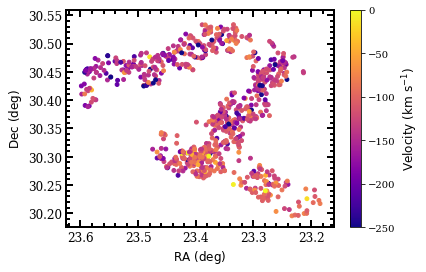

In [14]:
#radial map
single_plot()
#since points are independent of each other, just plotting one mask at a time with the same colorbar scale
plt.scatter(data1[0], data1[1], c=data1[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
plt.scatter(data2[0], data2[1], c=data2[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
plt.scatter(data3[0], data3[1], c=data3[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
plt.scatter(data4[0], data4[1], c=data4[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
plt.scatter(data5[0], data5[1], c=data5[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
plt.scatter(data6[0], data6[1], c=data6[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
plt.scatter(data7[0], data7[1], c=data7[2], cmap='plasma', s=15, vmin=-250,vmax=0)#, alpha=0.7)
clb = plt.colorbar()
clb.set_label(r'$\rm Velocity\ (km\ s^{-1})$', fontsize = 12)
plt.xlabel(r'$\rm RA\ (deg)$', fontsize=12)
plt.ylabel(r'$\rm Dec\ (deg)$', fontsize=12)
plt.gca().invert_xaxis()
plt.show()
#plt.savefig('/Users/amandaquirk/Desktop/velocity_maps.pdf', bbox_inches='tight')

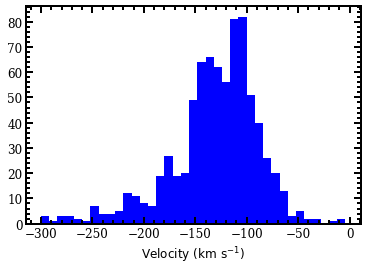

In [15]:
#velocity histogram

#below combines all of the velocity arrays into a single list -- you can't easily combine arrays, so I convert them to lists first
all_vs = data1[2].tolist() + data2[2].tolist() + data3[2].tolist() + data4[2].tolist() + data5[2].tolist() + data6[2].tolist() + data7[2].tolist()

single_plot()
plt.hist(all_vs, bins=range(-300, 0, 8), stacked=True, color='b') #range(minimum, maximum, spacing)
plt.xlabel(r'$\rm Velocity\ (km\ s^{-1})$', fontsize=12)
plt.show()
#plt.savefig('/Users/amandaquirk/Desktop/velocity_hist.pdf', bbox_inches='tight')